In [1]:
import pandas as pd
import os
import numpy as np
from glob import glob

In [2]:
files = glob('listings_*')

In [3]:
files.sort()
files

['listings_1.csv',
 'listings_10.csv',
 'listings_11.csv',
 'listings_12.csv',
 'listings_2.csv',
 'listings_4.csv',
 'listings_5.csv',
 'listings_6.csv',
 'listings_7.csv',
 'listings_8.csv',
 'listings_9.csv']

In [118]:
files

['listings_1.csv',
 'listings_10.csv',
 'listings_11.csv',
 'listings_12.csv',
 'listings_2.csv',
 'listings_4.csv',
 'listings_5.csv',
 'listings_6.csv',
 'listings_7.csv',
 'listings_8.csv',
 'listings_9.csv']

In [119]:
data_1 = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

In [121]:
airbnb_2019 = data_1.drop_duplicates()

In [122]:
airbnb_2019.shape

(444746, 16)

In [123]:
outlier = airbnb_2019.price >= 10000
outlier.head()

0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool

In [124]:
outlier_dt = airbnb_2019[outlier]

In [127]:
outlier_dt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10212,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.768096,-73.916506,Private room,10000,100,2,2016-02-13,0.05,1,0
17854,12833275,Private room in Astoria! 15 min train to the c...,905908,Andrey,Queens,Astoria,40.767965,-73.919920,Private room,10000,15,2,2017-08-12,0.08,1,31
19931,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.732596,-73.957388,Entire home/apt,10000,5,5,2017-07-27,0.20,1,0
59349,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.768100,-73.916510,Private room,10000,100,2,2016-02-13,0.04,1,0
67462,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.732600,-73.957390,Entire home/apt,10000,5,5,2017-07-27,0.15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542290,38374793,"NYCASA 46, Queen Bed, Steps from it all",287577131,Nycasa 46,Manhattan,Theater District,40.758740,-73.983830,Private room,10000,1,0,NaN,NaN,5,365
542291,38375070,"NYCASA 46, King Bed, Steps from it all",287577131,Nycasa 46,Manhattan,Theater District,40.758980,-73.984030,Private room,10000,1,0,NaN,NaN,5,365
542293,38375218,"NYCASA 46, Deluxe Queen Bed, Steps from it all",287577131,Nycasa 46,Manhattan,Theater District,40.758830,-73.982790,Private room,10000,1,0,NaN,NaN,5,365
542294,38375286,"NYCASA 46, Deluxe King Bed, Steps from it all",287577131,Nycasa 46,Manhattan,Theater District,40.758490,-73.982890,Private room,10000,1,0,NaN,NaN,5,365


In [126]:
outlier_dt.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.500000e+01,7.500000e+01,75.000000,75.000000,75.0,75.000000,75.000000,20.000000,75.000000,75.000000
mean,3.406374e+07,2.379279e+08,40.746223,-73.975783,10000.0,6.653333,0.693333,0.661000,5.093333,234.413333
std,9.506822e+06,1.025119e+08,0.025737,0.030602,0.0,20.075192,1.442345,0.640484,2.605469,142.263563
min,7.003697e+06,9.059080e+05,40.579670,-74.009780,10000.0,1.000000,0.000000,0.040000,1.000000,0.000000
25%,3.658446e+07,2.667551e+08,40.732600,-73.987595,10000.0,1.000000,0.000000,0.147500,5.000000,83.000000
50%,3.837507e+07,2.875771e+08,40.757670,-73.984100,10000.0,1.000000,0.000000,0.455000,5.000000,319.000000
75%,3.850787e+07,2.923182e+08,40.759110,-73.978495,10000.0,1.000000,1.000000,1.000000,6.000000,340.000000
max,4.000438e+07,3.084991e+08,40.779130,-73.770890,10000.0,100.000000,5.000000,2.000000,11.000000,365.000000


In [4]:
data = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

In [5]:
data_new = data.drop_duplicates()

In [6]:
data_new.shape

(444746, 16)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

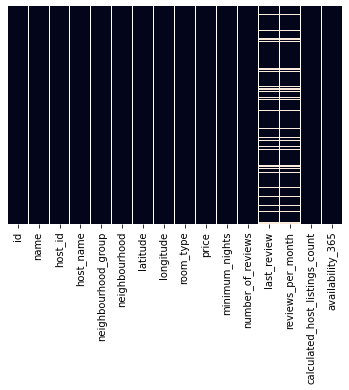

In [8]:
#null value
sns.heatmap(data_new.isnull(),yticklabels=False,cbar=False)


In [9]:
data_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.447460e+05,4.447460e+05,444746.000000,444746.000000,444746.000000,444746.000000,444746.000000,383205.000000,444746.000000,444746.000000
mean,2.027125e+07,7.425160e+07,40.728736,-73.950708,150.622830,7.150956,28.144739,1.542844,7.994979,135.720306
std,1.115055e+07,8.278859e+07,0.055024,0.047959,236.747523,18.324873,47.794271,1.698684,34.168517,134.330661
min,2.454000e+03,2.420000e+03,40.499790,-74.247870,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.114899e+07,8.314981e+06,40.689430,-73.983190,69.000000,1.000000,2.000000,0.310000,1.000000,1.000000
50%,2.139988e+07,3.565995e+07,40.723160,-73.954910,108.000000,2.000000,9.000000,0.940000,1.000000,88.000000
75%,2.985543e+07,1.265024e+08,40.763010,-73.933670,175.000000,5.000000,32.000000,2.290000,2.000000,271.000000
max,4.058402e+07,3.143682e+08,40.916860,-73.707680,10000.000000,1250.000000,675.000000,67.600000,387.000000,365.000000


In [10]:
data_new.isnull().sum()

id                                    0
name                                 63
host_id                               0
host_name                           671
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       61541
reviews_per_month                 61541
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
data_new[data_new['price']==0].head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26224,18539719,Beautiful bedroom in BushQueens,75044394,Jamie,Queens,Ridgewood,40.704146,-73.902097,Private room,0,1,3,2017-05-28,0.15,1,283
26582,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.690233,-73.954283,Private room,0,4,1,2018-01-06,0.08,4,90
29260,20277286,Cosy and very central room in Chinatown/Nolita!,3742692,Elif,Manhattan,Chinatown,40.717065,-73.994266,Private room,0,3,3,2018-05-29,0.27,1,0
29343,20326257,Studio in the Heart of the East Village,10947591,Laura,Manhattan,East Village,40.726499,-73.990587,Entire home/apt,0,3,12,2018-11-25,0.75,1,3
29365,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.832965,-73.886677,Private room,0,2,38,2018-12-20,2.45,4,170
29531,20466016,Feel at Home in this Lovely 1 Bedroom in Flushing,5962328,Alan,Queens,Flushing,40.759469,-73.822634,Entire home/apt,0,30,6,2018-11-13,0.41,12,272
29623,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.694672,-73.924331,Private room,0,2,11,2018-09-13,0.67,5,3
29689,20570245,Luxury Fifth Ave. 2Bdrm Apartment,9037281,Frankie,Manhattan,Midtown,40.747242,-73.987457,Entire home/apt,0,3,46,2018-12-26,2.83,1,0
29728,20586405,Rockaway beach Private room,51524470,Ola,Queens,Arverne,40.592486,-73.788464,Private room,0,1,8,2018-10-18,0.49,5,141
29784,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.724623,-73.940721,Private room,0,2,12,2017-10-27,0.72,2,0


In [12]:
data_new['price'].describe()

count    444746.000000
mean        150.622830
std         236.747523
min           0.000000
25%          69.000000
50%         108.000000
75%         175.000000
max       10000.000000
Name: price, dtype: float64

In [13]:
for i in range(0, 100, 10):
    var =data_new["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 49
20 percentile value is 60
30 percentile value is 75
40 percentile value is 90
50 percentile value is 108
60 percentile value is 130
70 percentile value is 158
80 percentile value is 199
90 percentile value is 268
100 percentile value is  10000


In [14]:
for i in range(90, 100, 1):
    var =data_new["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 268
91 percentile value is 280
92 percentile value is 299
93 percentile value is 300
94 percentile value is 329
95 percentile value is 350
96 percentile value is 399
97 percentile value is 450
98 percentile value is 500
99 percentile value is 750
100 percentile value is  10000


In [15]:
data_new[data_new['price']==10000].head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10212,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.768096,-73.916506,Private room,10000,100,2,2016-02-13,0.05,1,0
17854,12833275,Private room in Astoria! 15 min train to the c...,905908,Andrey,Queens,Astoria,40.767965,-73.919920,Private room,10000,15,2,2017-08-12,0.08,1,31
19931,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.732596,-73.957388,Entire home/apt,10000,5,5,2017-07-27,0.20,1,0
59349,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.768100,-73.916510,Private room,10000,100,2,2016-02-13,0.04,1,0
67462,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.732600,-73.957390,Entire home/apt,10000,5,5,2017-07-27,0.15,1,0


In [16]:
corr = data_new.corr(method='kendall')

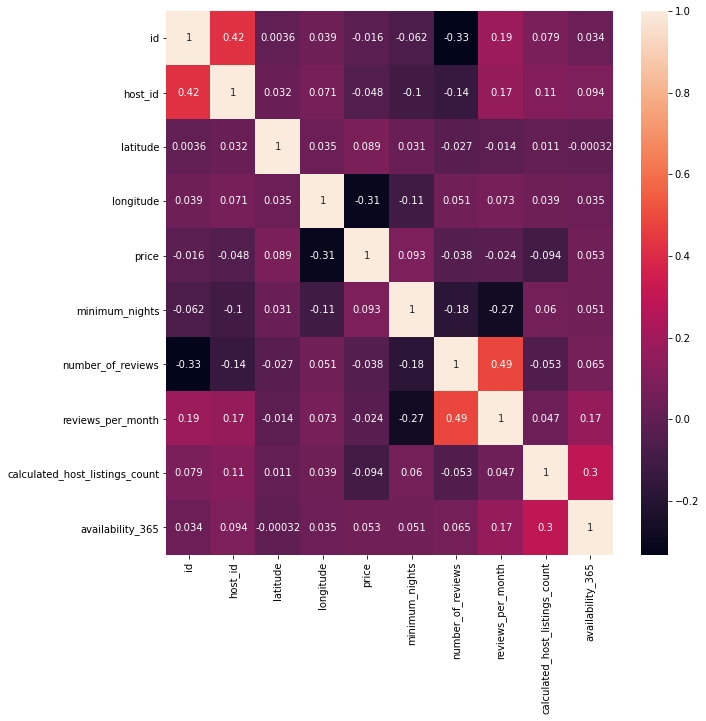

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'price')]

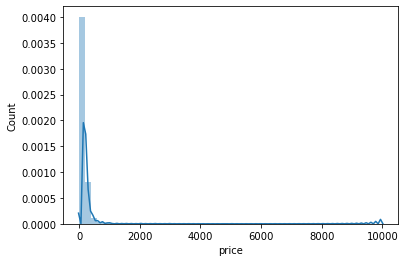

In [18]:
#Analyzing the price variable
sns.distplot(
    data_new['price'], norm_hist=False
).set(xlabel='price', ylabel='Count')

In [19]:
#Correlation for a Particular Column

data_new.corr()['price']

id                                0.021051
host_id                           0.028862
latitude                          0.036091
longitude                        -0.150564
price                             1.000000
minimum_nights                    0.025891
number_of_reviews                -0.046250
reviews_per_month                -0.037309
calculated_host_listings_count    0.062432
availability_365                  0.076719
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001534344C1C8>,
      dtype=object)

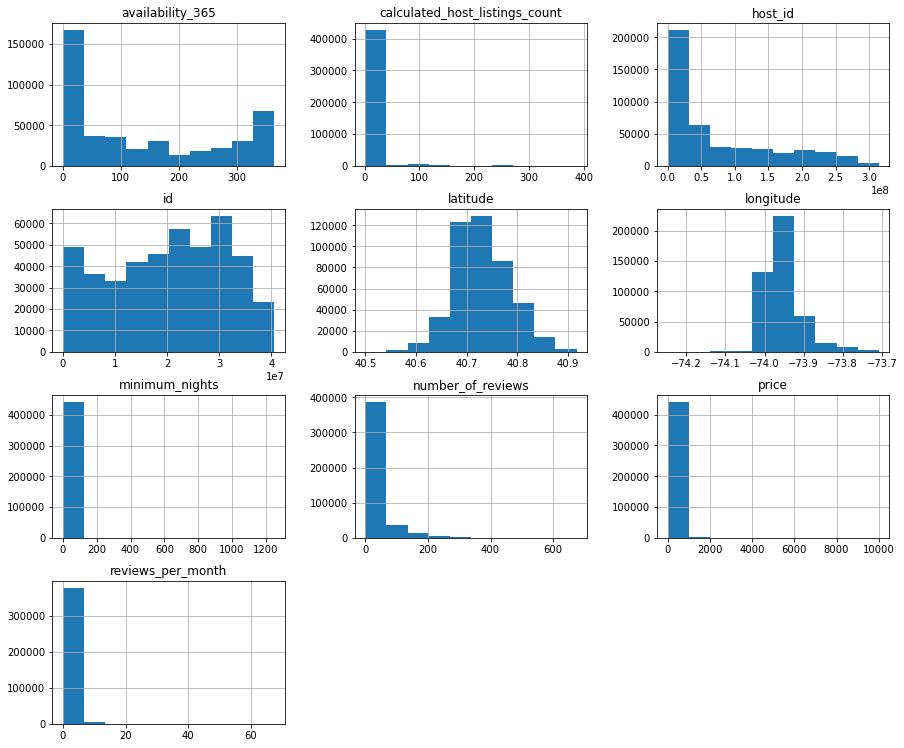

In [20]:
data_new.hist(figsize=(15,30),layout=(9,3))

Text(0.5, 1.0, 'Minimum nights vs. price')

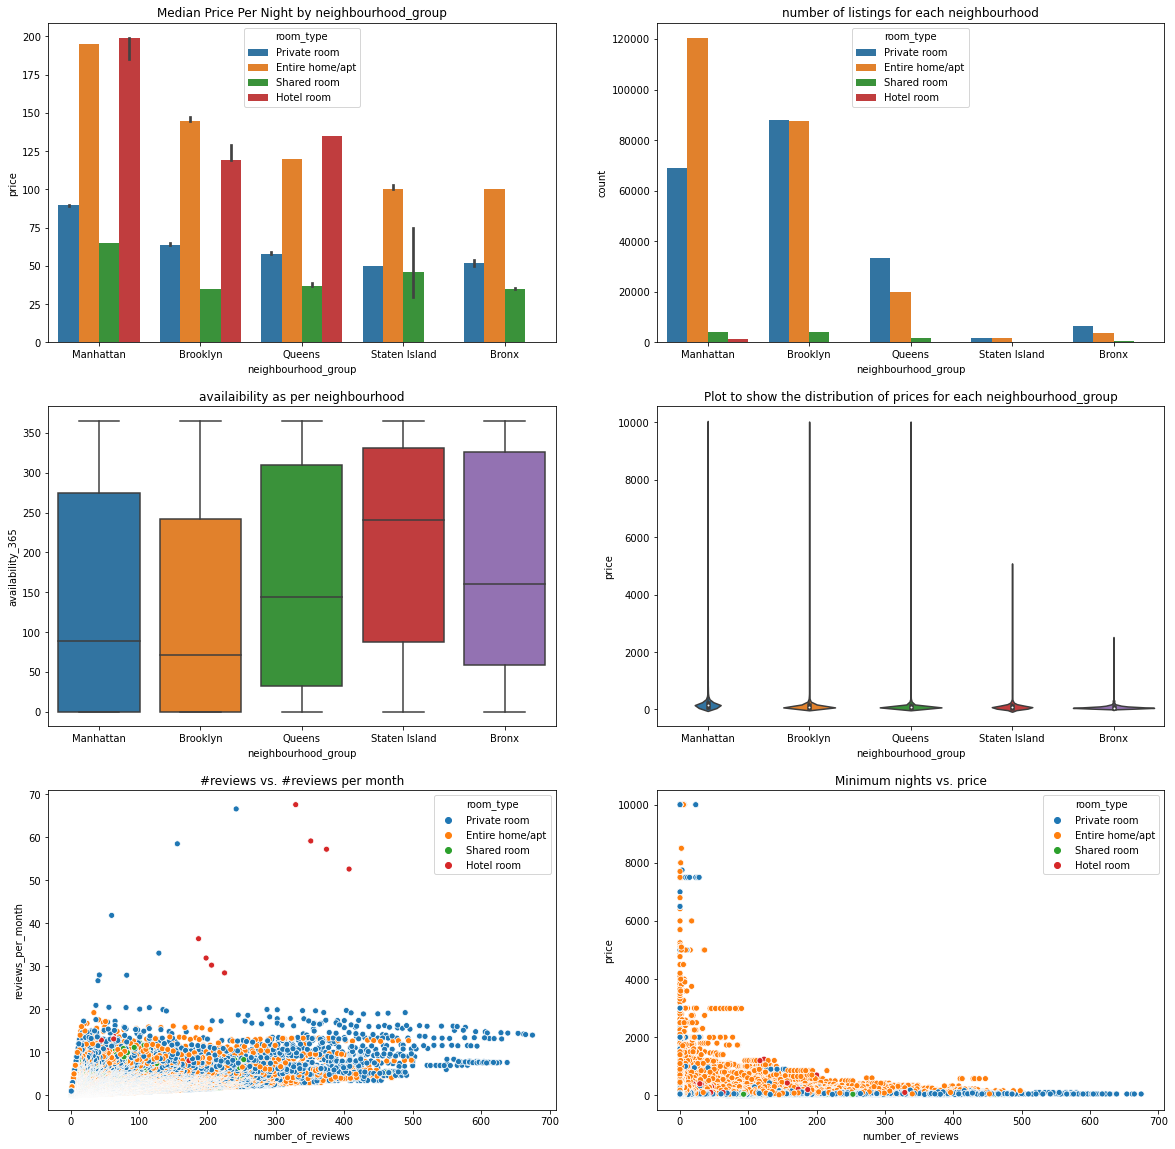

In [21]:
#6 subplots
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
sns.barplot(x="neighbourhood_group", y="price",hue="room_type",estimator=np.median, 
            data=data_new,ax=ax1).set_title("Median Price Per Night by neighbourhood_group")
sns.countplot(x="neighbourhood_group",hue="room_type",data=data_new,ax=ax2).set_title("number of listings for each neighbourhood")
sns.boxplot(x="neighbourhood_group",y="availability_365",data=data_new,ax=ax3).set_title("availaibility as per neighbourhood")
sns.violinplot(x="neighbourhood_group",y="price",data=data_new,ax=ax4).set_title("Plot to show the distribution of prices for each neighbourhood_group")
#ax4.set_ylim(0,500)

#To check the number of reviews per month correlation
sns.scatterplot(data=data_new,x="number_of_reviews",y="reviews_per_month",hue="room_type",ax=ax5).set_title("#reviews vs. #reviews per month")

# reviews = more expensive?
sns.scatterplot(data=data_new,x="number_of_reviews",y="price",hue="room_type",ax=ax6).set_title("Minimum nights vs. price")
#ax6.set_xlim(0,30)

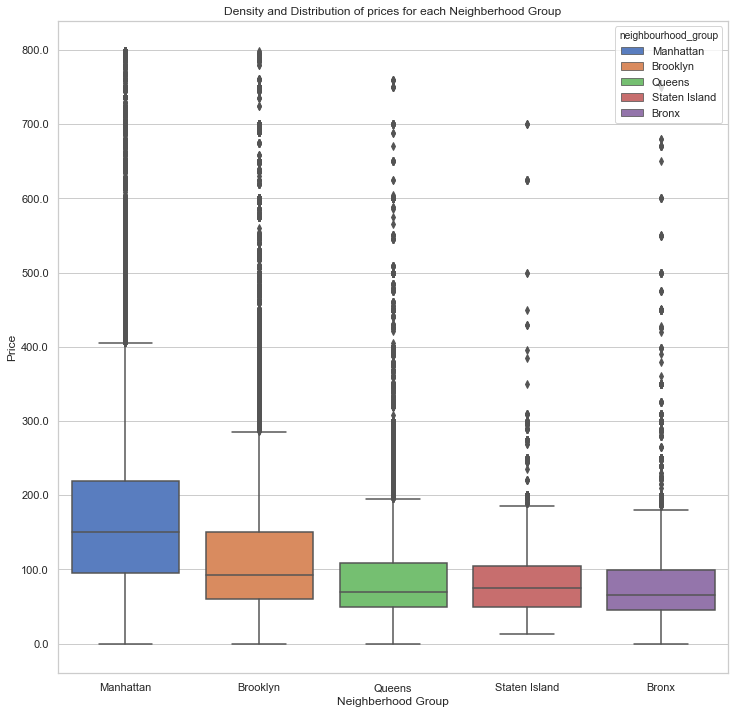

In [22]:
sns.set(style="whitegrid")
# Parameters
filtered_price = 800

# Filter airbnb prices for shake of the visualization
sub_airbnb_price = data_new[data_new.price < filtered_price]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.boxplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=sub_airbnb_price, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['{}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

In [23]:
data_new.room_type.value_counts()


Entire home/apt    233544
Private room       198670
Shared room         10879
Hotel room           1653
Name: room_type, dtype: int64

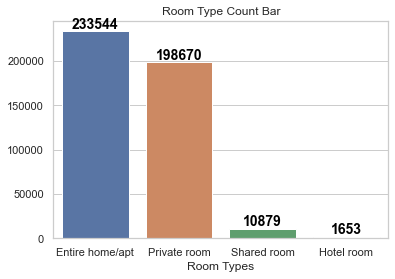

In [24]:
room_type_plot = sns.countplot(x="room_type", order = data_new.room_type.value_counts().index, data=data_new)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

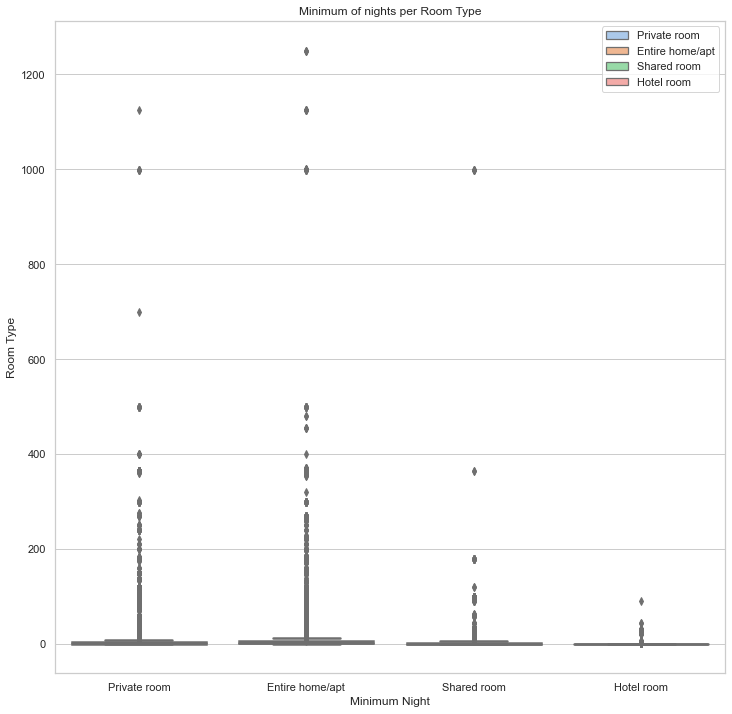

In [25]:
# BoxPlot Creation 
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="ticks", palette="pastel")
nights_per_room = sns.boxplot(x="room_type", y="minimum_nights", ax=ax,
                              hue="room_type", dodge=False, linewidth=2.5,
                              data=data_new,)

nights_per_room.set(xlabel='Minimum Night', ylabel='Room Type', 
                             title='Minimum of nights per Room Type')
plt.legend(loc='upper right')
plt.show()

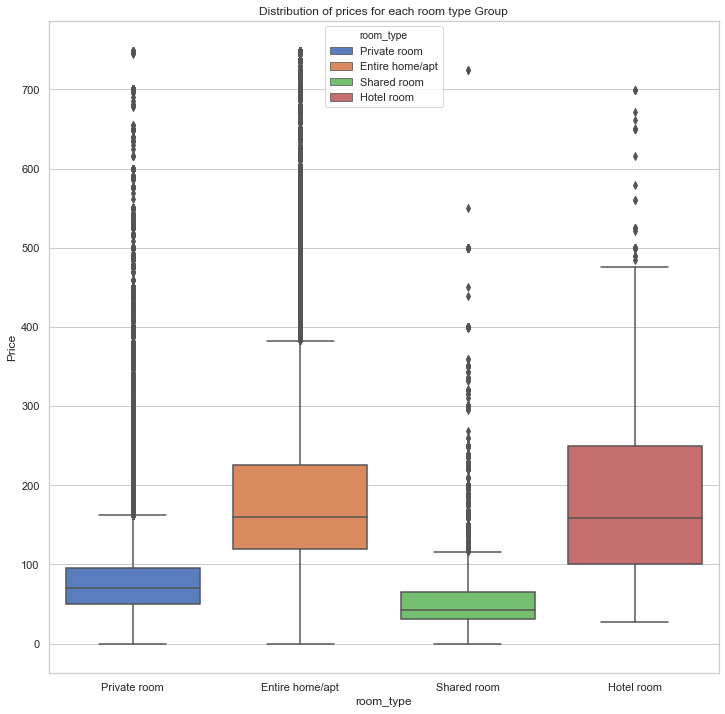

In [26]:
sns.set(style="whitegrid")
# Parameters
filtered_price = 750

# Filter airbnb prices for shake of the visualization
sub_airbnb_price = data_new[data_new.price < filtered_price]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_roomtype_price_plot = sns.boxplot(ax=ax, x="room_type", y="price", 
                                          hue="room_type", data=sub_airbnb_price, 
                                          palette="muted", dodge=False)
density_roomtype_price_plot.set(xlabel='room_type', ylabel='Price', 
                             title='Distribution of prices for each room type Group')
ylabels = ['{}'.format(x) for x in density_roomtype_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

In [27]:
#finding out top 10 neighbourhoods
data_new.neighbourhood.value_counts().head(10)

Bedford-Stuyvesant    35334
Williamsburg          33614
Harlem                24771
Bushwick              21583
Hell's Kitchen        19113
Upper West Side       16598
Upper East Side       16052
East Village          15746
Midtown               13934
Crown Heights         13770
Name: neighbourhood, dtype: int64

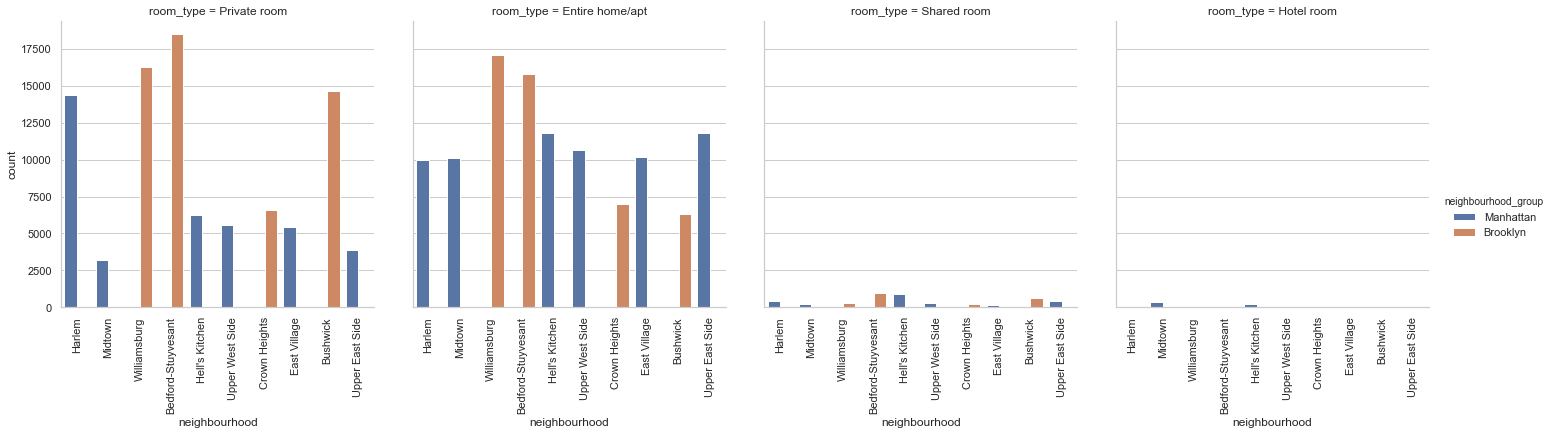

In [28]:
#let's now combine this  for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=data_new.loc[data_new['neighbourhood'].isin(['Bedford-Stuyvesant','Williamsburg','Harlem','Bushwick',
                 'Hell\'s Kitchen','Upper West Side','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

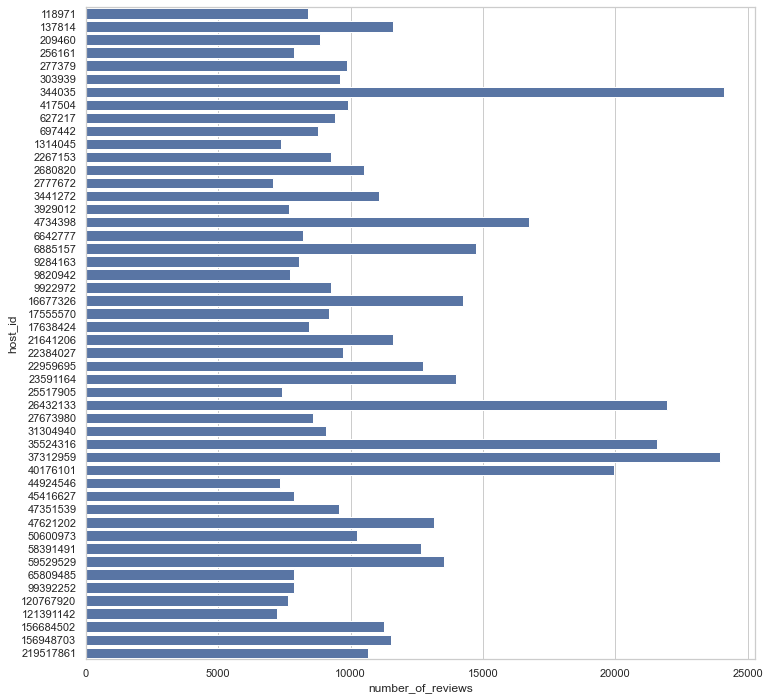

In [29]:
# Data Preparation for host id vs # reviews
airbnb = data_new.groupby("host_id")["number_of_reviews"].agg("sum")
frame = { 'host_id': airbnb.index, 'number_of_reviews': airbnb.values }
df_airbnb = pd.DataFrame(frame).sort_values('number_of_reviews', ascending=False).head(50)

# BarPlot creation 
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x="number_of_reviews", y="host_id", 
            data=df_airbnb, color="b", ax=ax, orient="h")

plt.show()

In [30]:
# dropping unnecessary column

data_new.drop('id', axis=1, inplace=True)
data_new.drop('host_id', axis=1, inplace=True)
data_new.drop('name', axis=1, inplace=True)
data_new.drop('host_name', axis=1, inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


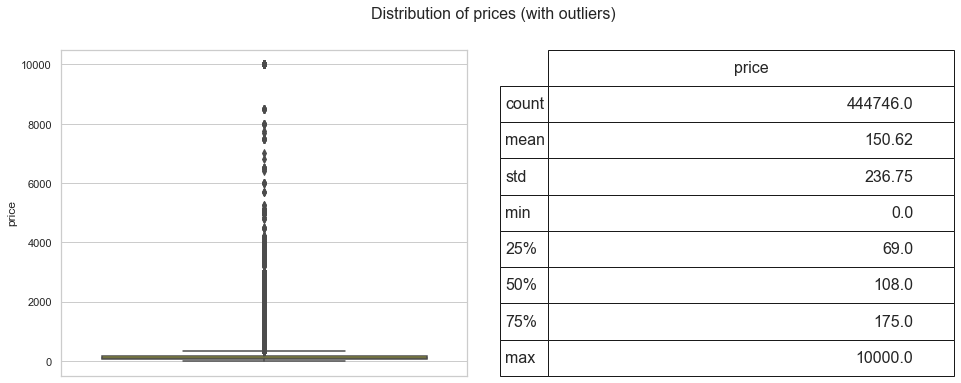

In [31]:
#Target:Price

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = data_new['price'], ax=ax1, color='yellow')
describe = data_new['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)

plt.show()

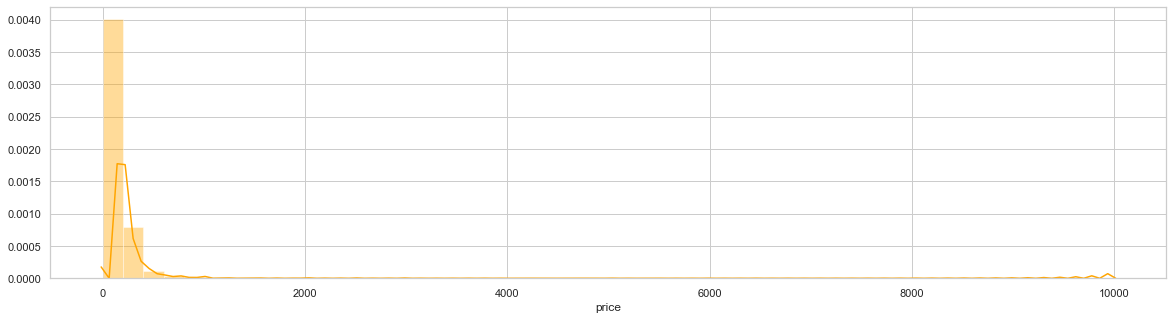

In [32]:
fig = plt.figure(figsize=(20,5))
sns.distplot(data['price'],color='orange')
plt.show()

# Distribution:
    
    Deviation from Normal Distribution
    presence of outliers
    showing skewness
    

In [33]:
print('skewness: {}'.format(data_new['price'].skew()))
print('kurtosis: {}'.format(data_new['price'].kurt()))



skewness: 22.625520095254867
kurtosis: 790.7160167235527


#Skewness - measure of symmetry/assymetry of distribution. If the distribution is perfectly symmetrical, 
#the value of skewness is equal to 0. If skewness > 0 : positive, if skewness < 0 : negative
#Kurtosis - measure of flattening distribution of a feature.

In [34]:
data_new.isnull().sum().sort_values(ascending=False)

reviews_per_month                 61541
last_review                       61541
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
dtype: int64

In [35]:
data_new['reviews_per_month'].fillna(value=0,inplace=True)
data_new.drop('last_review',axis=1,inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Harlem,40.799205,-73.953676,Private room,59,2,175,1.40,3,310
1,Brooklyn,Kensington,40.647486,-73.972370,Private room,149,1,9,0.24,8,365
2,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,43,0.39,2,365


In [37]:
data_new.isnull().sum().sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
dtype: int64

# Outliers in the Target Variable

In [38]:
#Tukey test will be implemented 

def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index

In [39]:
outliers_index = tukey_outliers(data_new,'price')


In [40]:
data_new.drop(outliers_index, inplace=True)
data_new.reset_index(drop=True, inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
data_new.shape

(418573, 11)

In [42]:
print('we have {} listings with price equal to 0.'.format(len(data_new[data_new['price']==0])))

we have 143 listings with price equal to 0.


In [43]:
data_new.drop(data_new[data_new['price']==0].index, inplace=True)


In [45]:
data_new.reset_index(drop=True, inplace=True)


In [46]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Harlem,40.799205,-73.953676,Private room,59,2,175,1.40,3,310
1,Brooklyn,Kensington,40.647486,-73.972370,Private room,149,1,9,0.24,8,365
2,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,43,0.39,2,365


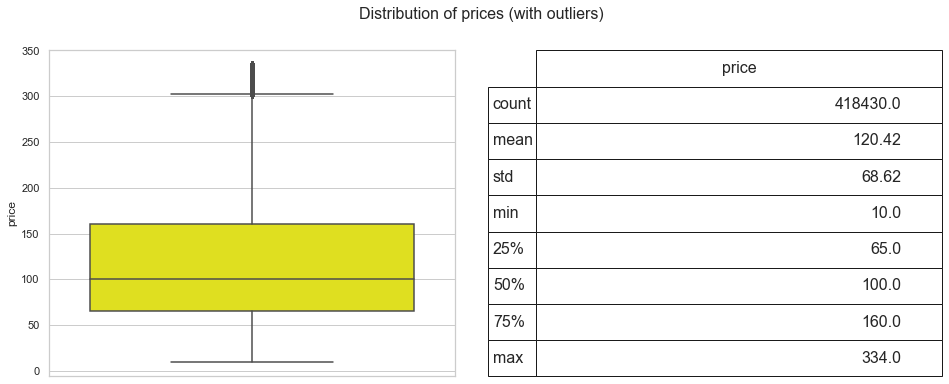

In [47]:
#Target:Price

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = data_new['price'], ax=ax1, color='yellow')
describe = data_new['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

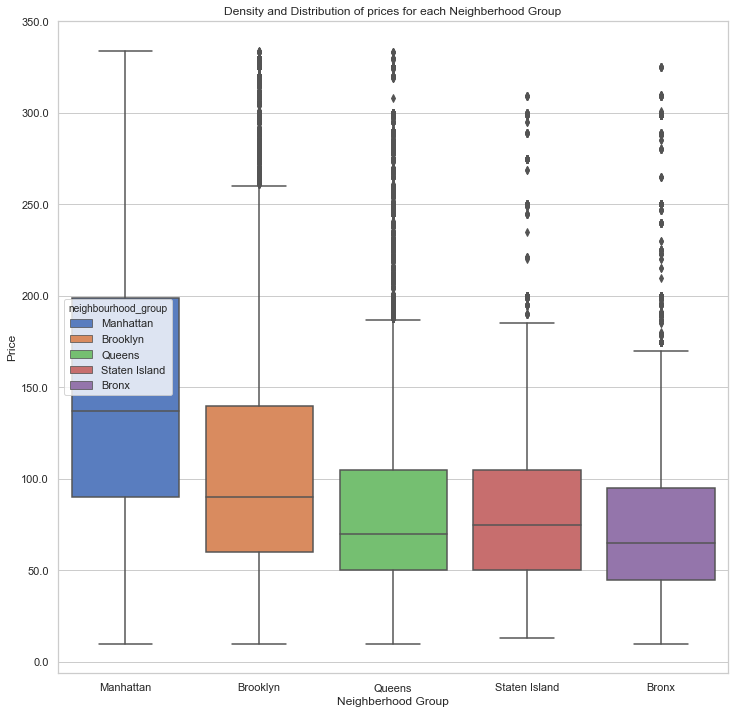

In [48]:
# Filter airbnb prices for shake of the visualization

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.boxplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=data_new, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['{}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

In [49]:
data_new.groupby(["neighbourhood_group"])['price'].mean()


neighbourhood_group
Bronx             77.974514
Brooklyn         106.516840
Manhattan        147.596644
Queens            87.645937
Staten Island     87.097453
Name: price, dtype: float64

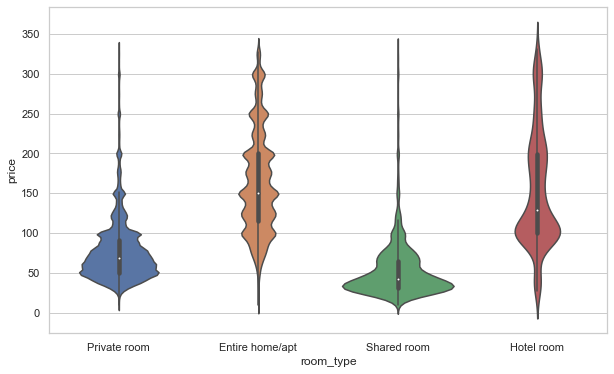

In [50]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.violinplot(data=data_new, x='room_type', y='price')
plt.show()

In [51]:
data_new.groupby(["room_type"])['price'].mean()


room_type
Entire home/apt    163.355205
Hotel room         153.049963
Private room        77.918416
Shared room         53.997207
Name: price, dtype: float64

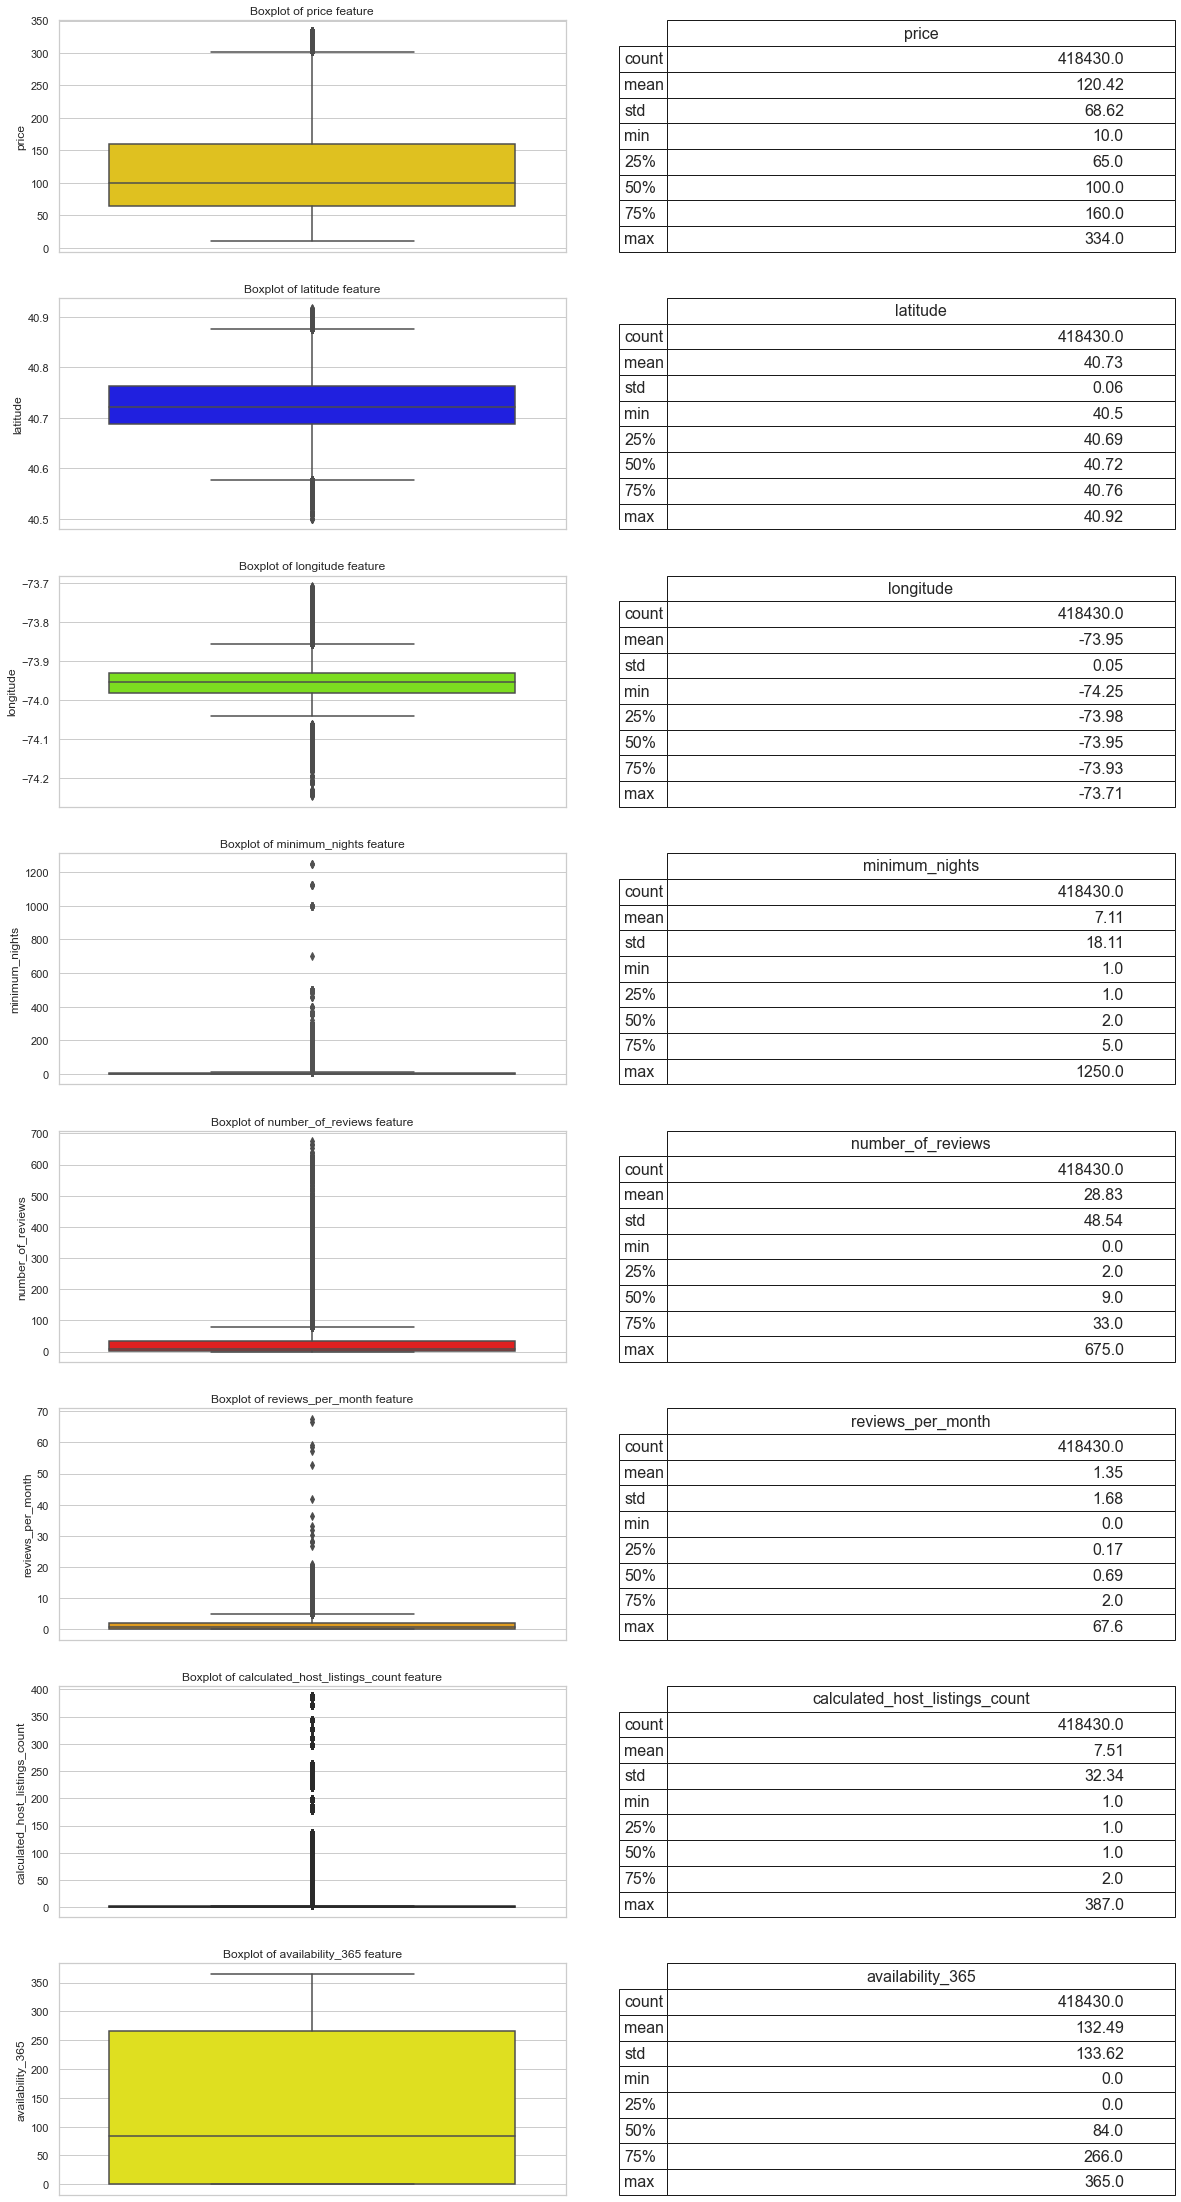

In [52]:
dists = data_new[['price','latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]

fig, ax = plt.subplots(8,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = data_new[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=data_new[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

In [36]:
data_new.shape

(418301, 11)

In [37]:
#data_new.to_csv ('data_new.csv', index = False, header=True)


In [38]:

#data_new.to_csv ('data_new2.csv', header=True)


In [39]:
data_new.shape


(418301, 11)

In [53]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [54]:
import scipy.stats as stats


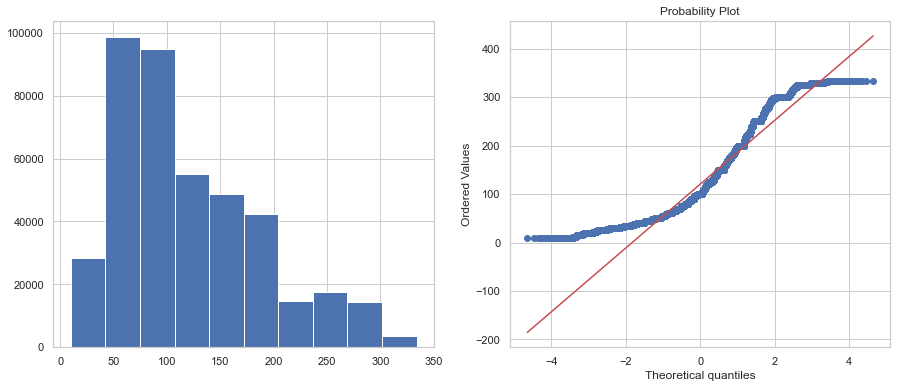

In [55]:
diagnostic_plots(data_new, 'price')


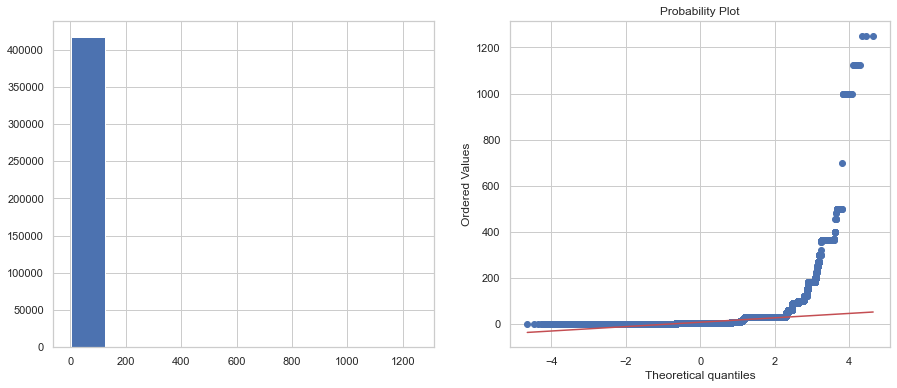

In [56]:
diagnostic_plots(data_new, 'minimum_nights')


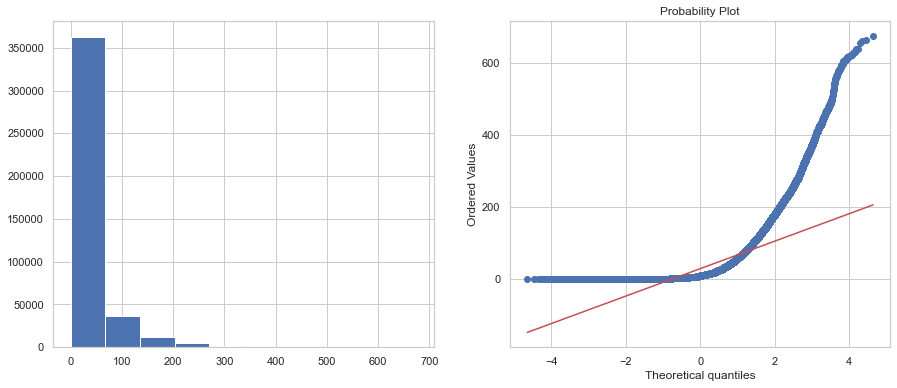

In [57]:
diagnostic_plots(data_new, 'number_of_reviews')


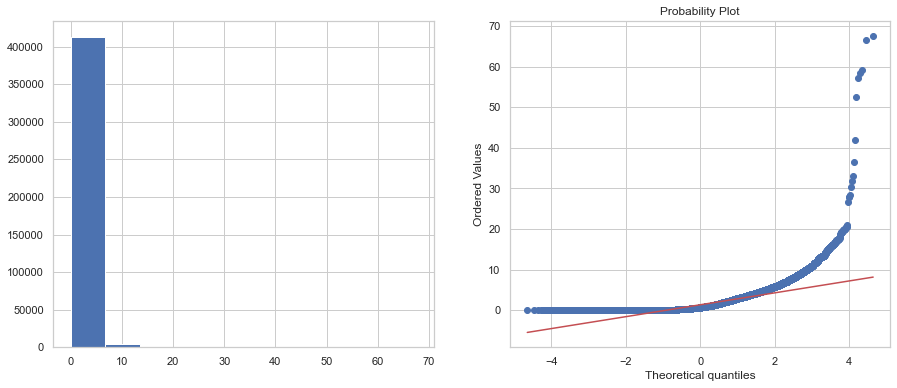

In [58]:
diagnostic_plots(data_new, 'reviews_per_month')


In [59]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

skewed_features = []
for column in dists:
    skew = abs(data_new[column].skew())
    print('{:15}'.format(column), 
          'Skewness: {:05.2f}'.format(skew),'Min value: {}'.format(data_new[column].min()))

price           Skewness: 00.92 Min value: 10
minimum_nights  Skewness: 20.60 Min value: 1
calculated_host_listings_count Skewness: 08.15 Min value: 1
number_of_reviews Skewness: 03.28 Min value: 0
reviews_per_month Skewness: 02.79 Min value: 0.0
availability_365 Skewness: 00.54 Min value: 0


In [60]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer

In [61]:

#Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

In [62]:
data_new['price'],price_lambda = boxcox(data_new['price'])
print('"price lambda": {}'.format(price_lambda))

"price lambda": 0.0895143049332677


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
data_new['minimum_nights'],lam = boxcox(data_new['minimum_nights'])
print('"minimum_nights lambda": {}'.format(lam))

"minimum_nights lambda": -0.47759482815426113


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
data_new['calculated_host_listings_count'],lam = boxcox(data_new['calculated_host_listings_count'])
print('calculated_host_listings_count: {}'.format(lam))

calculated_host_listings_count: -1.0586907796163991


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
values = data_new['number_of_reviews'].values
data1 = pd.DataFrame({'x':values})
pt.fit(data1)
print(pt.lambdas_)

[-0.04402662]


In [66]:
data_new['number_of_reviews']= boxcox1p(data_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))

"number_of_reviews lambda: [-0.04402662]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
values = data_new['reviews_per_month'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)

[-0.69483326]


In [68]:
data_new['reviews_per_month']= boxcox1p(data_new['reviews_per_month'],pt.lambdas_)
print('"reviews_per_month lambda: {}"'.format(pt.lambdas_))

"reviews_per_month lambda: [-0.69483326]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
values = data_new['availability_365'].values
data3 = pd.DataFrame({'x':values})
pt.fit(data3)
print(pt.lambdas_)

[0.23078922]


In [70]:
data_new['availability_365']= boxcox1p(data_new['availability_365'],pt.lambdas_)
print('"availability_365 lambda: {}"'.format(pt.lambdas_))

"availability_365 lambda: [0.23078922]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,6.887315,1.380291,3.482156,0.281502,0.500726,11.781786
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,5.470900,0.000000,4.850514,0.834060,0.000000,9.161370
2,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,6.701155,0.900074,3.857641,0.376726,0.000000,0.000000
3,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,4.901924,1.910330,3.514008,0.281502,0.000000,0.000000
4,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,5.296881,0.610228,5.155718,0.788776,0.000000,10.287693


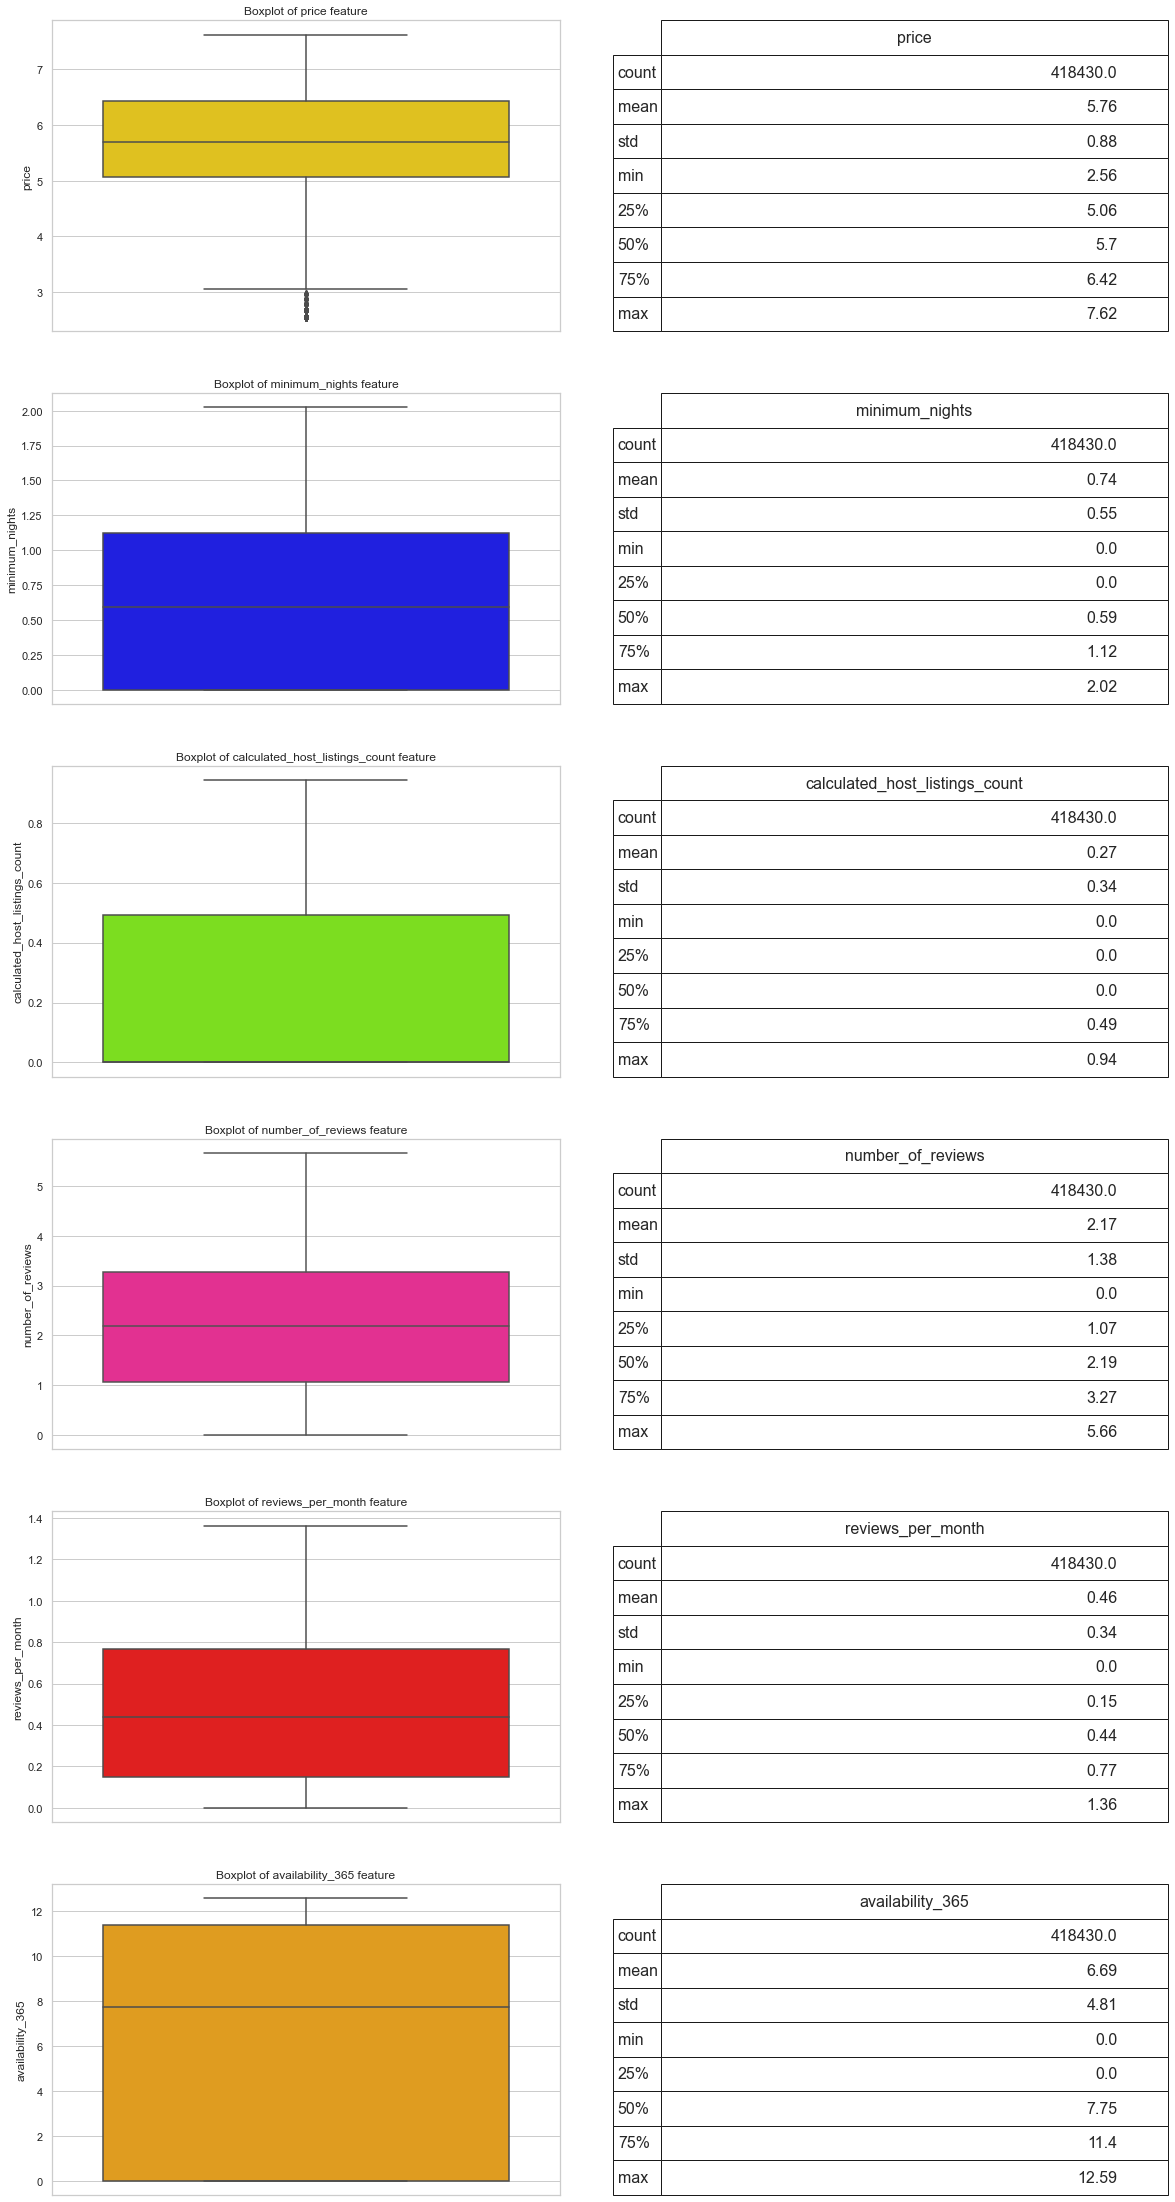

In [71]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

fig, ax = plt.subplots(6,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = data_new[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=data_new[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

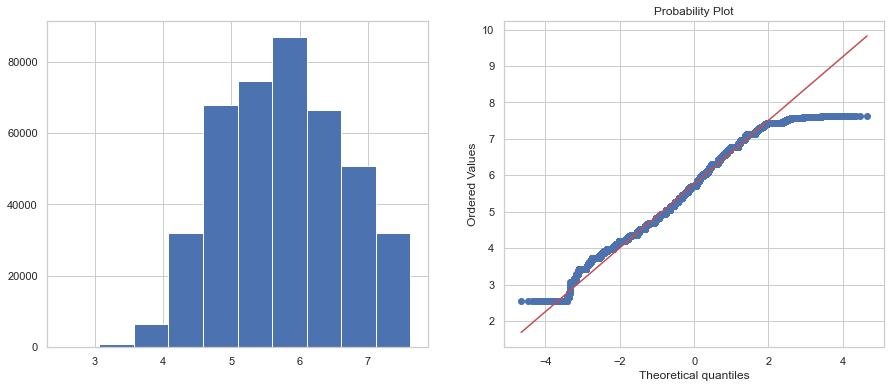

In [72]:
diagnostic_plots(data_new, 'price')


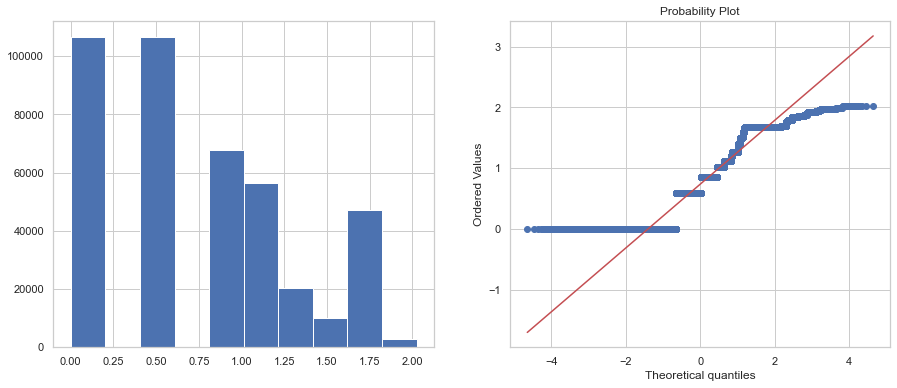

In [73]:
diagnostic_plots(data_new, 'minimum_nights')


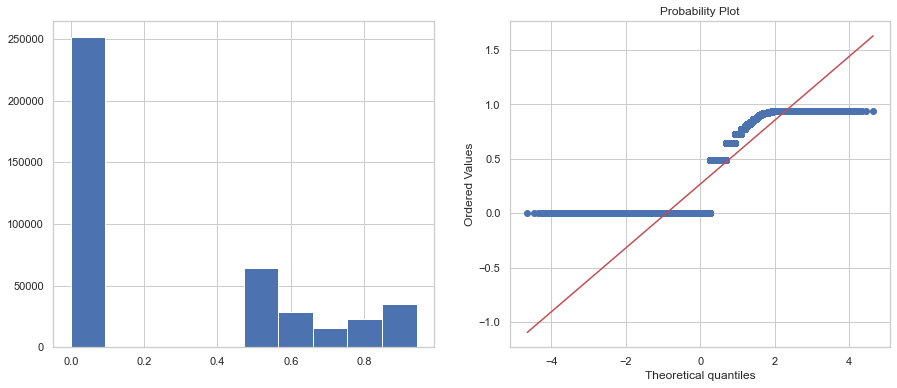

In [74]:
diagnostic_plots(data_new, 'calculated_host_listings_count')


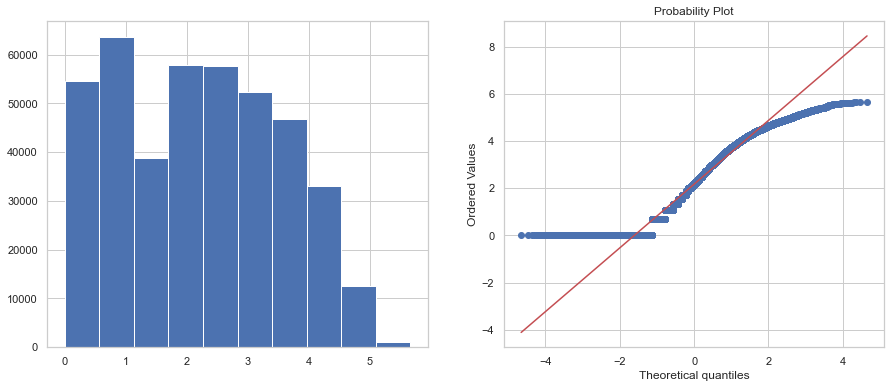

In [75]:
diagnostic_plots(data_new, 'number_of_reviews')


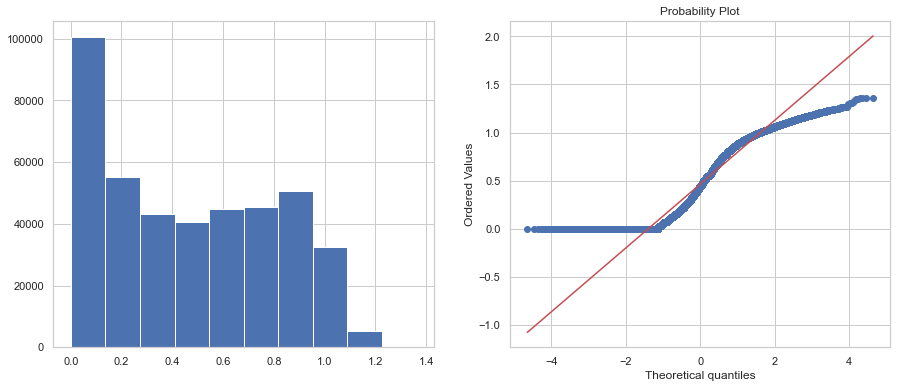

In [76]:
diagnostic_plots(data_new, 'reviews_per_month')


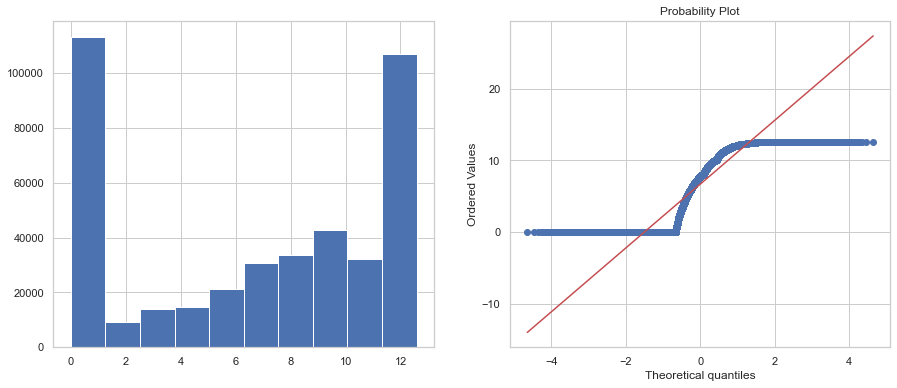

In [77]:
diagnostic_plots(data_new, 'availability_365')


In [78]:
for i in range(90, 100, 1):
    var =data_new["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 6.9696143888317605
91 percentile value is 6.998252338742778
92 percentile value is 7.074720527755043
93 percentile value is 7.141516596918353
94 percentile value is 7.141516596918353
95 percentile value is 7.1740071962784375
96 percentile value is 7.298423900016828
97 percentile value is 7.380702875084501
98 percentile value is 7.442842662201297
99 percentile value is 7.442842662201297
100 percentile value is  7.622590129338652


In [79]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [80]:
#transforming the categorical data
labelencoder = LabelEncoder()
data_new['neighbourhood'] = labelencoder.fit_transform(data_new['neighbourhood'])
data_new['neighbourhood_group'] = labelencoder.fit_transform(data_new['neighbourhood_group'])

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:
data_new = pd.get_dummies(data_new)


In [82]:
data_new.head()


,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,96,40.799205,-73.953676,4.921124,0.590094,4.624208,0.655880,0.649369,11.963256,0,0,1,0
1,1,110,40.647486,-73.972370,6.312521,0.000000,2.189719,0.199807,0.840058,12.587351,0,0,1,0
2,2,129,40.753621,-73.983774,6.969614,0.000000,3.485758,0.294346,0.491109,12.587351,1,0,0,0
3,1,217,40.708558,-73.942362,5.169285,1.123056,3.404905,0.276857,0.649369,11.612256,0,0,1,0
4,2,96,40.809018,-73.941902,6.322993,0.854829,0.000000,0.000000,0.000000,12.587351,0,0,1,0


# Predictive Model

In [83]:
target = data_new['price']


In [84]:
data_new.drop('price', axis=1, inplace=True)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = .2, random_state=42)

In [86]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (334744, 13)
Dimensions of the training target vector: (334744,)
Dimensions of the test feature matrix: (83686, 13)
Dimensions of the test target vector: (83686,)


In [87]:
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 64).get_n_splits(data)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [88]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [89]:
for LinearModel in [LinearRegression, RandomForestRegressor, XGBRegressor]:
    if LinearModel == XGBRegressor: 
        reg = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: 
        reg = rmse_cv(LinearModel())
    print('{}: {:.3f} +/- {:.3f}'.format(LinearModel.__name__, -reg.mean(), reg.std()))

LinearRegression: 0.354 +/- 0.002
RandomForestRegressor: 0.070 +/- 0.001
XGBRegressor: 0.274 +/- 0.001


In [90]:
def rmse(actual,predicted):
    return(np.sqrt(mean_squared_error(actual, predicted)))

In [91]:
def model_scores(model, cv_model, y_train, y_test, pred_train, pred_test):
    mse = mean_squared_error(y_test, lin_reg_pred_test)
    results = pd.DataFrame({'Model':['{}'.format(type(model).__name__)],
                'CV error': '{:.3f}'.format(cv_model.mean()), 
                'CV std': '{:.3f}'.format(cv_model.std()),
                'RMSE train': [rmse(y_train, pred_train)],
                'RMSE test': [rmse(y_test, pred_test)],
                'R2 train': [r2_score(y_train, pred_train)],
                'R2 test': [r2_score(y_test, pred_test)]})
    results = results.round(decimals=4)

    return results

# Linear Regression

In [92]:
from sklearn.metrics import mean_squared_error, r2_score


In [93]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_cv = -rmse_cv(LinearRegression())
lin_reg_pred_train = lin_reg.predict(X_train)
lin_reg_pred_test = lin_reg.predict(X_test)

lin_reg_results = model_scores(lin_reg, lin_reg_cv, y_train, y_test, lin_reg_pred_train, lin_reg_pred_test)

lin_reg_results.style.hide_index()

Model,CV error,CV std,RMSE train,RMSE test,R2 train,R2 test
LinearRegression,0.354,0.002,0.594600,0.595800,0.543900,0.541100


In [94]:
lin_reg.coef_


array([ 5.33140600e-02,  6.41184649e-04,  1.39838625e+00, -4.47234609e+00,
       -1.60479109e-01, -1.86754582e-02, -8.02173134e-02, -5.69354641e-02,
        2.07009335e-02,  8.30734719e-01,  3.73489748e-01, -2.76507965e-01,
       -9.27716503e-01])

# Random Forest

In [95]:
rfr_reg = RandomForestRegressor(random_state=42)
rfr_reg.fit(X_train, y_train) 

rfr_reg_cv = -rmse_cv(RandomForestRegressor())
rfr_pred_train = rfr_reg.predict(X_train)
rfr_pred_test = rfr_reg.predict(X_test)

rfr_reg_results = model_scores(rfr_reg, rfr_reg_cv, y_train, y_test, rfr_pred_train, rfr_pred_test)

rfr_reg_results.style.hide_index()

Model,CV error,CV std,RMSE train,RMSE test,R2 train,R2 test
RandomForestRegressor,0.070,0.001,0.090800,0.241400,0.989400,0.924700


# XGBOOST

In [96]:
xgb_reg = XGBRegressor(n_estimators=1000)
xgb_reg.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

[12:22:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [97]:
xgb_reg = XGBRegressor(learning_rate=0.3,
                      n_estimators=1000,
                      max_depth=6, min_child_weight=1)

xgb_reg_cv = -rmse_cv(xgb_reg)

xgb_reg.fit(X_train, y_train)
xgb_pred_train = xgb_reg.predict(X_train)
xgb_pred_test = xgb_reg.predict(X_test)

xgb_reg_results = model_scores(xgb_reg, xgb_reg_cv, y_train, y_test, xgb_pred_train, xgb_pred_test)

xgb_reg_results.style.hide_index()

[12:28:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:37:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model,CV error,CV std,RMSE train,RMSE test,R2 train,R2 test
XGBRegressor,0.138,0.001,0.328800,0.368200,0.860600,0.824700


In [98]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error

# XGBOOST

In [99]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test)),
        r2_score(y_test,xgb_pred_test) * 100,
        mean_absolute_error(y_test,xgb_pred_test)
        ))


        Mean Squared Error: 0.3682162703877934
        R2 Score: 82.47496265182751
        Mean Absolute Error: 0.2715425653847894
     


# Random Forest

In [100]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, rfr_pred_test)),
        r2_score(y_test,rfr_pred_test) * 100,
        mean_absolute_error(y_test,rfr_pred_test)
        ))


        Mean Squared Error: 0.24142804628776
        R2 Score: 92.46595096411687
        Mean Absolute Error: 0.1349288223755594
     


# Linear Regression

In [101]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, lin_reg_pred_test)),
        r2_score(y_test,lin_reg_pred_test) * 100,
        mean_absolute_error(y_test,lin_reg_pred_test)
        ))


        Mean Squared Error: 0.5958223186543604
        R2 Score: 54.1133305237846
        Mean Absolute Error: 0.4661708639382209
     


In [102]:
from keras import models, layers, optimizers, regularizers


Using TensorFlow backend.
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [104]:
X_train.shape[1]

13

In [105]:
# X_train.head()

# ANN

In [106]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(13, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(13, activation='relu'))
nn2.add(layers.Dense(6, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 455
Trainable params: 455
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)


Train on 301269 samples, validate on 33475 samples
Epoch 1/100
301269/301269 [==============================] - 4s 13us/step - loss: 0.7546 - mean_squared_error: 0.7546 - val_loss: 0.4373 - val_mean_squared_error: 0.4373
Epoch 2/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.4020 - mean_squared_error: 0.4020 - val_loss: 0.3985 - val_mean_squared_error: 0.3985
Epoch 3/100
301269/301269 [==============================] - 3s 11us/step - loss: 0.4001 - mean_squared_error: 0.4001 - val_loss: 0.3982 - val_mean_squared_error: 0.3982
Epoch 4/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.3992 - mean_squared_error: 0.3992 - val_loss: 0.4011 - val_mean_squared_error: 0.4011
Epoch 5/100
301269/301269 [==============================] - 3s 10us/step - loss: 0.3984 - mean_squared_error: 0.3984 - val_loss: 0.4238 - val_mean_squared_error: 0.4238
Epoch 6/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.3987 - mean_squar

301269/301269 [==============================] - 3s 9us/step - loss: 0.3477 - mean_squared_error: 0.3477 - val_loss: 0.3496 - val_mean_squared_error: 0.3496
Epoch 48/100
301269/301269 [==============================] - 3s 10us/step - loss: 0.3455 - mean_squared_error: 0.3455 - val_loss: 0.3451 - val_mean_squared_error: 0.3451
Epoch 49/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.3459 - mean_squared_error: 0.3459 - val_loss: 0.3446 - val_mean_squared_error: 0.3446
Epoch 50/100
301269/301269 [==============================] - 3s 10us/step - loss: 0.3437 - mean_squared_error: 0.3437 - val_loss: 0.3480 - val_mean_squared_error: 0.3480
Epoch 51/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.3441 - mean_squared_error: 0.3441 - val_loss: 0.3431 - val_mean_squared_error: 0.3431
Epoch 52/100
301269/301269 [==============================] - 3s 11us/step - loss: 0.3437 - mean_squared_error: 0.3437 - val_loss: 0.3460 - val_mean_squared_erro

301269/301269 [==============================] - 3s 9us/step - loss: 0.3335 - mean_squared_error: 0.3335 - val_loss: 0.3363 - val_mean_squared_error: 0.3363
Epoch 96/100
301269/301269 [==============================] - 3s 10us/step - loss: 0.3335 - mean_squared_error: 0.3335 - val_loss: 0.3330 - val_mean_squared_error: 0.3330
Epoch 97/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.3330 - mean_squared_error: 0.3330 - val_loss: 0.3354 - val_mean_squared_error: 0.3354
Epoch 98/100
301269/301269 [==============================] - 3s 10us/step - loss: 0.3330 - mean_squared_error: 0.3330 - val_loss: 0.3383 - val_mean_squared_error: 0.3382
Epoch 99/100
301269/301269 [==============================] - 3s 9us/step - loss: 0.3330 - mean_squared_error: 0.3330 - val_loss: 0.3360 - val_mean_squared_error: 0.3360
Epoch 100/100
301269/301269 [==============================] - 3s 11us/step - loss: 0.3328 - mean_squared_error: 0.3328 - val_loss: 0.3335 - val_mean_squared_err

In [108]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
        # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()


Training MSE: 0.3306
Validation MSE: 0.3317

Training r2: 0.5735
Validation r2: 0.5712


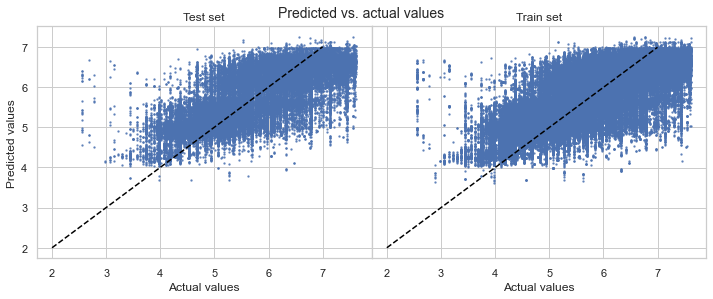

In [109]:
nn_model_evaluation(nn2)


# Model 3: four-layer neural network with L1 regularization and more epochs


In [110]:
# Building the model
nn3 = models.Sequential()
nn3.add(layers.Dense(20, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(13, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(6, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(3, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(1, activation='linear'))

In [111]:
# Compiling the model
nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [112]:
# Model summary
print(nn3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                273       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
#model training
nn3_history = nn3.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

Train on 301269 samples, validate on 33475 samples
Epoch 1/150
301269/301269 [==============================] - 4s 13us/step - loss: 8.6944 - mean_squared_error: 8.2962 - val_loss: 0.8784 - val_mean_squared_error: 0.5394
Epoch 2/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.7610 - mean_squared_error: 0.4355 - val_loss: 0.7221 - val_mean_squared_error: 0.4148
Epoch 3/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.6941 - mean_squared_error: 0.4045 - val_loss: 0.6736 - val_mean_squared_error: 0.4013
Epoch 4/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.6555 - mean_squared_error: 0.4008 - val_loss: 0.6390 - val_mean_squared_error: 0.4015
Epoch 5/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.6258 - mean_squared_error: 0.4023 - val_loss: 0.6156 - val_mean_squared_error: 0.4054
Epoch 6/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.5991 - mean_squ

301269/301269 [==============================] - 3s 12us/step - loss: 0.4286 - mean_squared_error: 0.3985 - val_loss: 0.4311 - val_mean_squared_error: 0.4012
Epoch 49/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4278 - mean_squared_error: 0.3980 - val_loss: 0.4385 - val_mean_squared_error: 0.4085
Epoch 50/150
301269/301269 [==============================] - 4s 13us/step - loss: 0.4282 - mean_squared_error: 0.3985 - val_loss: 0.4320 - val_mean_squared_error: 0.4023
Epoch 51/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.4274 - mean_squared_error: 0.3977 - val_loss: 0.4299 - val_mean_squared_error: 0.4003
Epoch 52/150
301269/301269 [==============================] - 4s 13us/step - loss: 0.4276 - mean_squared_error: 0.3981 - val_loss: 0.4360 - val_mean_squared_error: 0.4066
Epoch 53/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4281 - mean_squared_error: 0.3987 - val_loss: 0.4323 - val_mean_squared_e

Epoch 96/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4249 - mean_squared_error: 0.3981 - val_loss: 0.4261 - val_mean_squared_error: 0.3993
Epoch 97/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4240 - mean_squared_error: 0.3972 - val_loss: 0.4256 - val_mean_squared_error: 0.3987
Epoch 98/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4245 - mean_squared_error: 0.3978 - val_loss: 0.4256 - val_mean_squared_error: 0.3989
Epoch 99/150
301269/301269 [==============================] - 3s 12us/step - loss: 0.4249 - mean_squared_error: 0.3982 - val_loss: 0.4293 - val_mean_squared_error: 0.4027
Epoch 100/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4242 - mean_squared_error: 0.3976 - val_loss: 0.4271 - val_mean_squared_error: 0.4004
Epoch 101/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4242 - mean_squared_error: 0.3976 - val_loss: 0.4255 - val

301269/301269 [==============================] - 4s 12us/step - loss: 0.4213 - mean_squared_error: 0.3948 - val_loss: 0.4231 - val_mean_squared_error: 0.3967
Epoch 144/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4219 - mean_squared_error: 0.3955 - val_loss: 0.4237 - val_mean_squared_error: 0.3971
Epoch 145/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4217 - mean_squared_error: 0.3953 - val_loss: 0.4223 - val_mean_squared_error: 0.3958
Epoch 146/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4206 - mean_squared_error: 0.3942 - val_loss: 0.4366 - val_mean_squared_error: 0.4100
Epoch 147/150
301269/301269 [==============================] - 3s 11us/step - loss: 0.4213 - mean_squared_error: 0.3949 - val_loss: 0.4244 - val_mean_squared_error: 0.3978
Epoch 148/150
301269/301269 [==============================] - 4s 12us/step - loss: 0.4210 - mean_squared_error: 0.3945 - val_loss: 0.4224 - val_mean_squa

Training MSE: 0.3918
Validation MSE: 0.3923

Training r2: 0.4945
Validation r2: 0.493


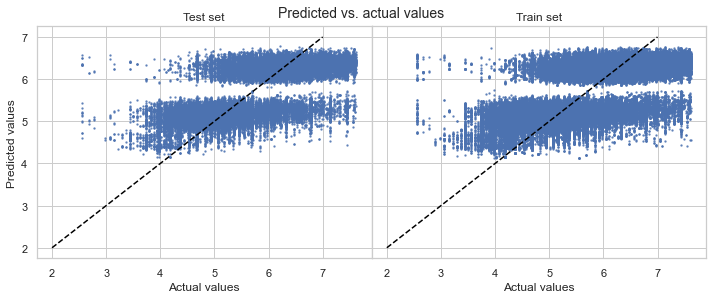

In [114]:
nn_model_evaluation(nn3)


# ANN WITH SGD Optimizer

In [115]:
# Building the model
nn4 = models.Sequential()
nn4.add(layers.Dense(13, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005),activation='relu'))
nn4.add(layers.Dense(13, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(6, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn4.compile(loss='mean_squared_error',
            optimizer='SGD',
            metrics=['mean_squared_error'])

# Model summary
print(nn4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_11 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 455
Trainable params: 455
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
#model training
nn4_history = nn4.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

Train on 301269 samples, validate on 33475 samples
Epoch 1/150
301269/301269 [==============================] - 4s 12us/step - loss: 1950588400869.6562 - mean_squared_error: 1428785987584.0000 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 2/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 3/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 4/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 5/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mea

301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 44/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 45/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 46/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 47/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 48/150
301269/301269 [====================

301269/301269 [==============================] - 2s 6us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 86/150
301269/301269 [==============================] - 2s 6us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 87/150
301269/301269 [==============================] - 2s 8us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7792
Epoch 88/150
301269/301269 [==============================] - 2s 8us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 89/150
301269/301269 [==============================] - 3s 9us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7790
Epoch 90/150
301269/301269 [=========================

301269/301269 [==============================] - 4s 12us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 128/150
301269/301269 [==============================] - 4s 12us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 129/150
301269/301269 [==============================] - 4s 15us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 130/150
301269/301269 [==============================] - 4s 12us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 131/150
301269/301269 [==============================] - 3s 10us/step - loss: 523581358080.0000 - mean_squared_error: 0.7748 - val_loss: 523581358080.0000 - val_mean_squared_error: 0.7791
Epoch 132/150
301269/301269 [===============

Training MSE: 0.7752
Validation MSE: 0.7737

Training r2: -0.0
Validation r2: -0.0


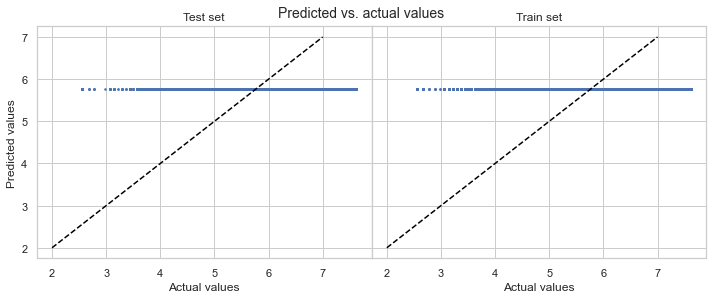

In [117]:
nn_model_evaluation(nn4)


# Using Keras Tuner

#model performed worse here

# Light GBM for prediction